In [2]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('data.xlsx')

In [3]:
d = data['d'][0:10]
L = data['L'][0]
H = data['H'][0]
D = data['D'][0]
M = data['M'][0:22]
F = 9.8 * M
x = D * data['x'][0:22] / (2*H)

In [4]:
d_mean = d.mean()
print(d_mean)

0.7021


In [5]:
slope, intercept, r_value, p_value, std_err = linregress(x, F)
print(slope, intercept, r_value, p_value, std_err)
slope_uncertainty = std_err * np.sqrt(np.sum(x**2) / len(x))


87.58493523416345 -7.622138979758638 0.9991705882281403 2.77029937035476e-29 0.7981505149464223


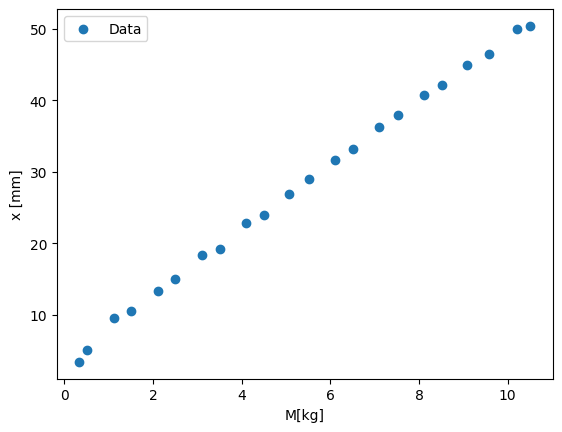

In [6]:
plt.scatter(M, data['x'], label='Data')
plt.ylabel('x [mm]')
plt.xlabel('M[kg]')
plt.legend()
plt.show()

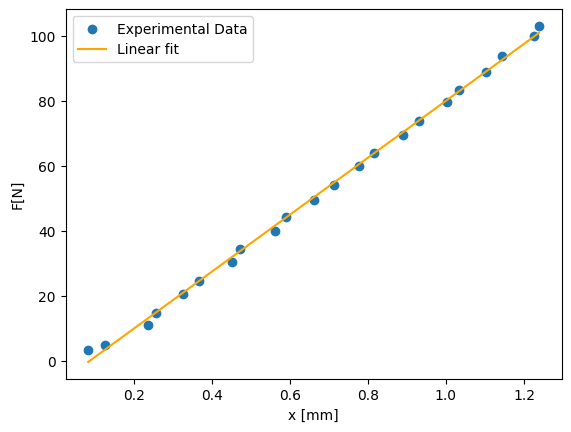

F/delta_x =  87.58493523416345


In [7]:
def lin(x, a, b):
    return a*x + b
linex = np.linspace(x.min(), x.max(), 100)
plt.scatter(x, F, label='Experimental Data')
plt.plot(linex, lin(linex, slope, intercept), color='orange',label='Linear fit')
plt.xlabel('x [mm]')
plt.ylabel('F[N]')
plt.legend()
plt.show()
print("F/delta_x = ", slope)

In [8]:
E = (4*L/(np.pi*(d_mean**2)))*slope*10e6
print(E)

1728362935290.992


In [9]:
d_uncertainty = d.std()
print(d_uncertainty)


0.0032812599206199266
